# ART HopSkipJump Attack

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
!{sys.executable} -m pip install git+https://github.com/nottombrown/imagenet_stubs
sys.path.append("..")

%matplotlib inline

import imagenet_stubs
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from matplotlib import pyplot as plt
from IPython.display import clear_output

from art.classifiers import KerasClassifier
from art.attacks import HopSkipJump
from art.utils import to_categorical

Using TensorFlow backend.


# Model Definition

In [2]:
mean_imagenet = np.zeros([224, 224,3])
mean_imagenet[...,0].fill(103.939)
mean_imagenet[...,1].fill(116.779)
mean_imagenet[...,2].fill(123.68)
model = ResNet50(weights='imagenet')
classifier = KerasClassifier(clip_values=(0, 255), model=model, preprocessing=(mean_imagenet, 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# Get Target and Init Images

Target image is:  105


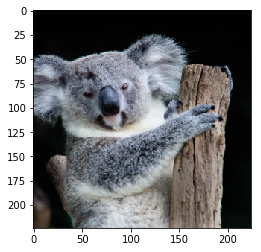

Init image is:  866


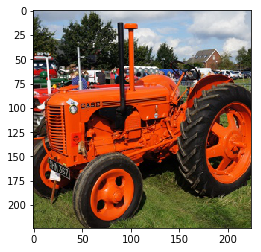

In [3]:
target_image_name = 'koala.jpg'
init_image_name = 'tractor.jpg'
for image_path in imagenet_stubs.get_image_paths():
    if image_path.endswith(target_image_name):
        target_image = image.load_img(image_path, target_size=(224, 224))
        target_image = image.img_to_array(target_image)
    if image_path.endswith(init_image_name):
        init_image = image.load_img(image_path, target_size=(224, 224))
        init_image = image.img_to_array(init_image)

print("Target image is: ", np.argmax(classifier.predict(np.array([target_image]))[0]))
plt.imshow(target_image.astype(np.uint))
plt.show()
print("Init image is: ", np.argmax(classifier.predict(np.array([init_image]))[0]))
plt.imshow(init_image.astype(np.uint))
plt.show()

# HopSkipJump Untargeted Attack

Adversarial image at step 0. L2 error 14391.989 and class label 354.


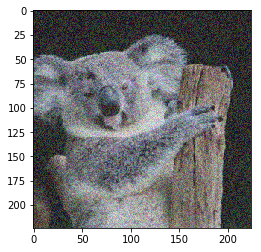

Adversarial image at step 10. L2 error 8198.243 and class label 354.


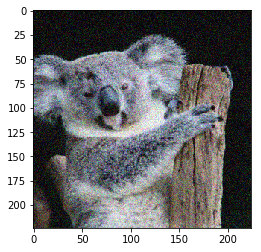

Adversarial image at step 20. L2 error 5376.415 and class label 354.


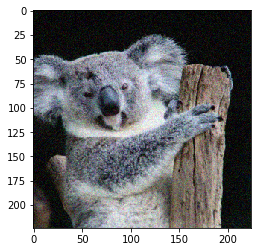

Adversarial image at step 30. L2 error 3819.9016 and class label 354.


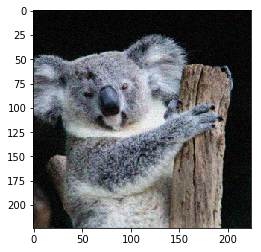

Adversarial image at step 40. L2 error 2912.5857 and class label 354.


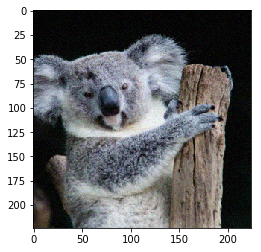

Adversarial image at step 50. L2 error 2376.5032 and class label 354.


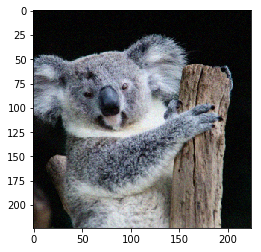

Adversarial image at step 60. L2 error 1954.8391 and class label 354.


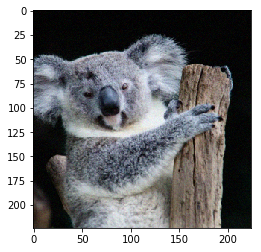

Adversarial image at step 70. L2 error 1690.2998 and class label 354.


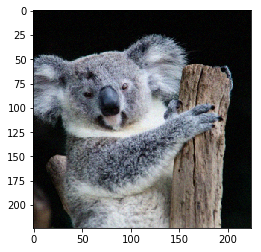

Adversarial image at step 80. L2 error 1462.9307 and class label 354.


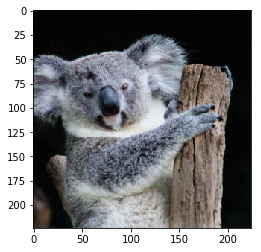

Adversarial image at step 90. L2 error 1296.7178 and class label 354.


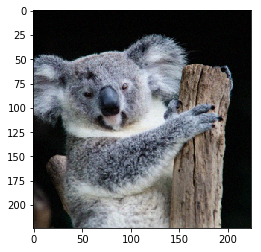

In [4]:
attack = HopSkipJump(classifier=classifier, targeted=False, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = None
for i in range(10):
    x_adv = attack.generate(x=np.array([target_image]), x_adv_init=x_adv)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step

# HopSkipJump Targeted Attack

Adversarial image at step 0. L2 error 44399.297 and class label 866.


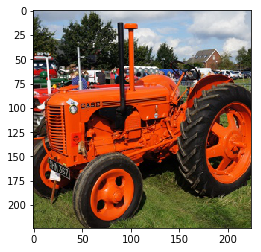

Adversarial image at step 10. L2 error 16854.133 and class label 866.


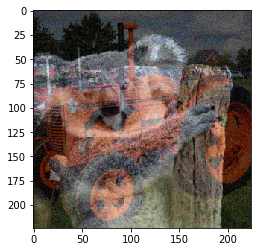

Adversarial image at step 20. L2 error 14446.067 and class label 866.


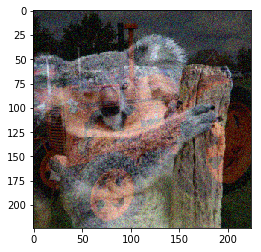

Adversarial image at step 30. L2 error 12604.998 and class label 866.


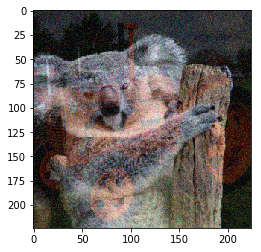

Adversarial image at step 40. L2 error 10373.098 and class label 866.


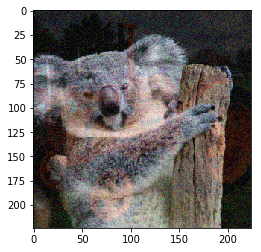

Adversarial image at step 50. L2 error 8513.004 and class label 866.


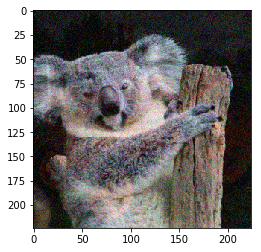

Adversarial image at step 60. L2 error 7317.975 and class label 866.


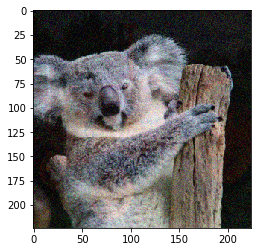

Adversarial image at step 70. L2 error 6097.8203 and class label 866.


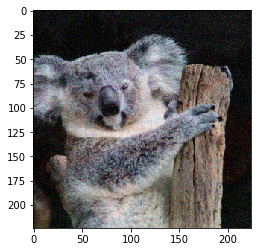

Adversarial image at step 80. L2 error 5224.695 and class label 866.


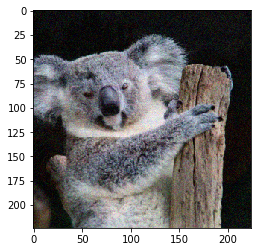

Adversarial image at step 90. L2 error 4572.369 and class label 866.


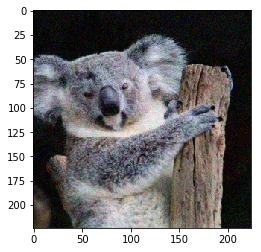

In [5]:
attack = HopSkipJump(classifier=classifier, targeted=True, max_iter=0, max_eval=1000, init_eval=10)
iter_step = 10
x_adv = np.array([init_image])
for i in range(10):
    x_adv = attack.generate(x=np.array([target_image]), y=to_categorical([866], 1000), x_adv_init=x_adv)

    #clear_output()
    print("Adversarial image at step %d." % (i * iter_step), "L2 error", 
          np.linalg.norm(np.reshape(x_adv[0] - target_image, [-1])),
          "and class label %d." % np.argmax(classifier.predict(x_adv)[0]))
    plt.imshow(x_adv[0].astype(np.uint))
    plt.show(block=False)
    
    attack.max_iter = iter_step